In [1]:
import cv2
import matplotlib.pyplot as plt
import deepdish as dd
import numpy as np
import random

data = dd.io.load("dataset/cable_pose.h5")

X, Y = data["X"], data["Y"]
X, Y = np.array(X), np.array(Y)
X.shape



# Y[:,2] /= 90.

(10000, 90, 120, 3)

In [2]:
Y_theta = np.hstack([Y, np.cos(Y[:,[2]] / 180. * np.pi)])
Y_theta[:, 2] = np.sin(Y_theta[:, 2] / 180. * np.pi)

N = int(X.shape[0] * 0.8)
X_train, Y_train = X[:N], Y_theta[:N]
X_test, Y_test = X[N:], Y_theta[N:]

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 5)
#         self.conv4 = nn.Conv2d(32, 128, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 7 * 11, 512)
#         self.fc1 = nn.Linear(128 * 1 * 3, 120)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 4)

    def forward(self, x):
        x = x.permute(0, 3, 1, 2)
        x = torch.tanh(self.conv1(x))
        x = self.pool(x)
        x = torch.tanh(self.conv2(x))
        x = self.pool(x)
        x = torch.tanh(self.conv3(x))
        x = self.pool(x)
#         x = self.pool(torch.tanh(self.conv4(x)))
#         x = x.permute(0, 2, 3, 1)
#         print(x.size())
        x = x.reshape(-1, 32 * 7 * 11)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def fit(self, X_train, Y_train, device):
        batch_size = 32
        N = X_train.shape[0]


        optim = torch.optim.Adam(self.parameters(), lr=0.0005)
        sum_loss = 0
        total = 0

        sum_loss = 0
        total = 0
        
        for epoch in range(50):
            
            if epoch % 5 == 0:
                idx = list(range(N))
                random.shuffle(idx)

                X_train = X_train[idx]
                Y_train = Y_train[idx]
        
            for i in range(N // batch_size):
                # clear gradients accumulated on the parameters
                optim.zero_grad()

                # get an input (say we only care inputs sampled from N(0, I))
                # x = torch.randn(batch_size, 8, device=cuda0)  # this has to be on GPU too
                x = torch.tensor(
                    X_train[i * batch_size : (i + 1) * batch_size], dtype=torch.float32
                ).to(device)
                y = torch.tensor(
                    Y_train[i * batch_size : (i + 1) * batch_size], dtype=torch.float32
                ).to(device)

                # forward pass
                result = self.forward(x)  # CHANGED: fc => net

                # compute loss
                loss = F.mse_loss(result, y)

                # compute gradients
                loss.backward()

                # let the optimizer do its work; the parameters will be updated in this call
                optim.step()

                sum_loss += loss.item()
                total += 1
                # add some printing
            if (epoch + 1) % 1 == 0:
                print(
                    "epoch {}\titeration {}\tloss {:.5f}".format(
                        epoch, i, sum_loss / total
                    )
                )

    def predict(self, X_test, device):
        with torch.no_grad():
            return self.forward(torch.tensor(X_test, dtype=torch.float32).to(device)).cpu().numpy()


device = torch.device("cuda:0")
        
net = Net().to(device)
net.fit(X_train, Y_train, device)

# x = torch.tensor(X[:5], dtype=torch.float32).to(device)
# y = net(x)
# print(y.size())

epoch 0	iteration 249	loss 0.15237
epoch 1	iteration 249	loss 0.10250
epoch 2	iteration 249	loss 0.07723
epoch 3	iteration 249	loss 0.06273
epoch 4	iteration 249	loss 0.05309
epoch 5	iteration 249	loss 0.04619
epoch 6	iteration 249	loss 0.04092
epoch 7	iteration 249	loss 0.03674
epoch 8	iteration 249	loss 0.03332
epoch 9	iteration 249	loss 0.03043
epoch 10	iteration 249	loss 0.02808
epoch 11	iteration 249	loss 0.02601
epoch 12	iteration 249	loss 0.02419
epoch 13	iteration 249	loss 0.02263
epoch 14	iteration 249	loss 0.02128
epoch 15	iteration 249	loss 0.02010
epoch 16	iteration 249	loss 0.01902
epoch 17	iteration 249	loss 0.01803
epoch 18	iteration 249	loss 0.01713
epoch 19	iteration 249	loss 0.01631
epoch 20	iteration 249	loss 0.01557
epoch 21	iteration 249	loss 0.01490
epoch 22	iteration 249	loss 0.01428
epoch 23	iteration 249	loss 0.01370
epoch 24	iteration 249	loss 0.01318
epoch 25	iteration 249	loss 0.01269
epoch 26	iteration 249	loss 0.01224
epoch 27	iteration 249	loss 0.01182
ep

In [4]:

net.fit(X_train, Y_train, device)

epoch 0	iteration 249	loss 0.00051
epoch 1	iteration 249	loss 0.00105
epoch 2	iteration 249	loss 0.00089
epoch 3	iteration 249	loss 0.00085
epoch 4	iteration 249	loss 0.00075
epoch 5	iteration 249	loss 0.00067
epoch 6	iteration 249	loss 0.00060
epoch 7	iteration 249	loss 0.00055
epoch 8	iteration 249	loss 0.00050
epoch 9	iteration 249	loss 0.00047
epoch 10	iteration 249	loss 0.00045
epoch 11	iteration 249	loss 0.00044
epoch 12	iteration 249	loss 0.00044
epoch 13	iteration 249	loss 0.00069
epoch 14	iteration 249	loss 0.00073
epoch 15	iteration 249	loss 0.00071
epoch 16	iteration 249	loss 0.00069
epoch 17	iteration 249	loss 0.00066
epoch 18	iteration 249	loss 0.00063
epoch 19	iteration 249	loss 0.00060
epoch 20	iteration 249	loss 0.00058
epoch 21	iteration 249	loss 0.00055
epoch 22	iteration 249	loss 0.00053
epoch 23	iteration 249	loss 0.00052
epoch 24	iteration 249	loss 0.00050
epoch 25	iteration 249	loss 0.00049
epoch 26	iteration 249	loss 0.00048
epoch 27	iteration 249	loss 0.00048
ep

[0.39516202 0.27043697 0.63846296 0.7744758 ] [0.38197387 0.26478488 0.60024442 0.79981663]


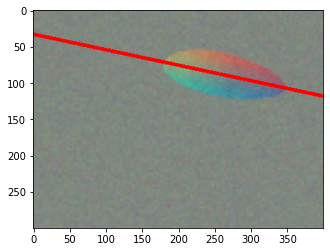

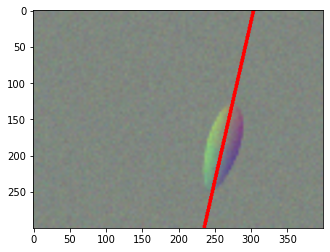

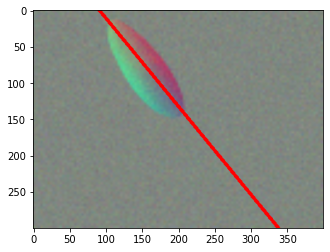

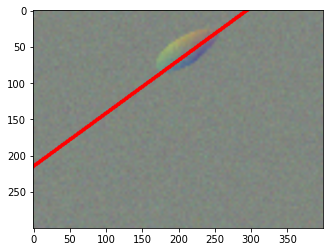

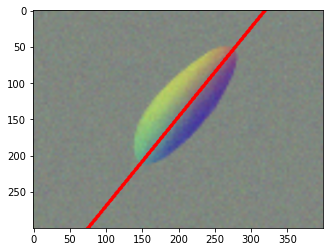

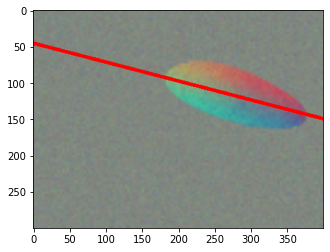

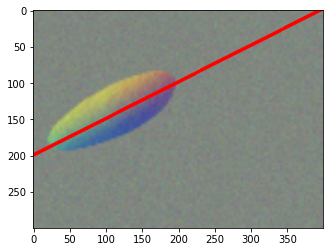

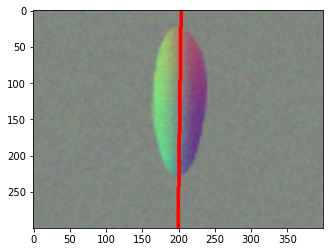

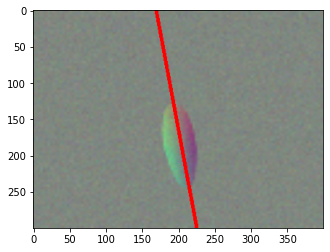

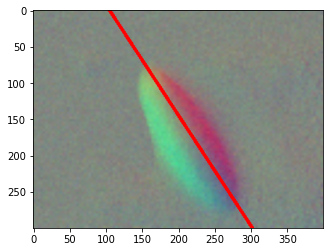

In [5]:
Y_pred = net.predict(X_test, device)
i = 2
print(Y_pred[i], Y_test[i])


def draw_line(img, theta, x0, y0):
    theta = theta / 180. * np.pi
    img = img.copy()
    rows, cols = img.shape[:2]
    
    center = np.array([x0 * cols, y0 * rows])
    
    d = 1100
    
    start_point = center + (d * np.sin(theta), d * np.cos(theta))
    end_point = center - (d * np.sin(theta), d * np.cos(theta))
    
    start_point = tuple(start_point.astype(np.int))
    end_point = tuple(end_point.astype(np.int))

    color = (0, 0, 1)
    thickness = 4
    
    img = cv2.line(img, start_point, end_point, color, thickness) 
    return img


def imshow(im, vmin=0, vmax=1):
    plt.imshow(im[:,:,::-1], vmax=vmax, vmin=vmin)
    plt.show()
    
for i in range(10):
    x, y = X_test[i], Y_pred[i]
    x = cv2.resize(x, (400, 300))
    theta = np.arctan2(y[2], y[3])
    rendered_img_line = draw_line(x, theta/np.pi*180., y[0], y[1])
    imshow(rendered_img_line)

In [7]:
frames = dd.io.load("data/cable.h5")

[ 0.4403739   0.42294347 -0.00718407  1.0407276 ]


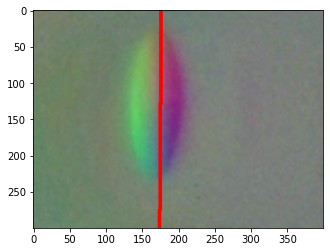

[ 0.43899256  0.4095516  -0.01053306  1.05521   ]


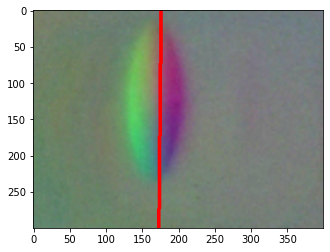

[ 0.43645895  0.40458745 -0.00361835  1.0407876 ]


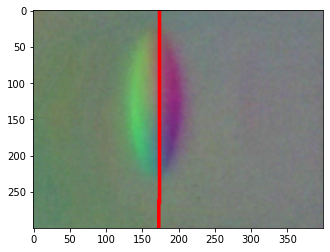

[0.43358296 0.45675167 0.029378   1.0092384 ]


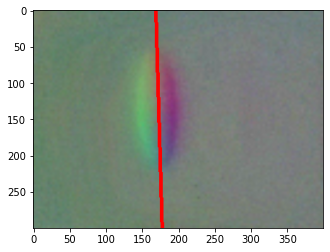

[0.4257807  0.4768515  0.04908873 0.99799013]


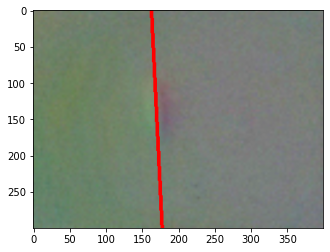

[0.429554   0.48894274 0.10172366 0.9607611 ]


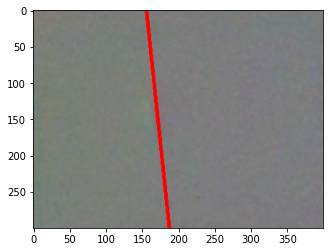

[0.43610436 0.47339708 0.40293738 0.9325589 ]


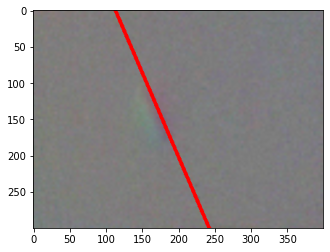

[0.43668002 0.49428576 0.47615445 0.9026028 ]


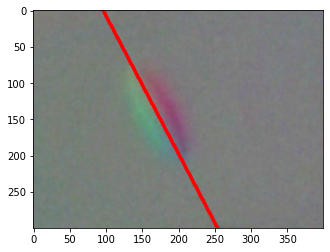

[0.4102924  0.4731521  0.44763055 0.91341877]


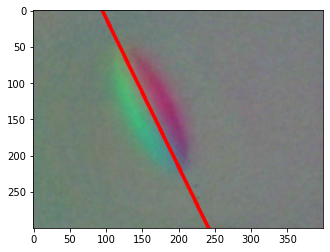

[0.41171944 0.4857387  0.4484768  0.8958216 ]


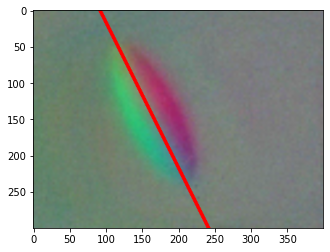

[0.42299628 0.4939878  0.47150075 0.89287734]


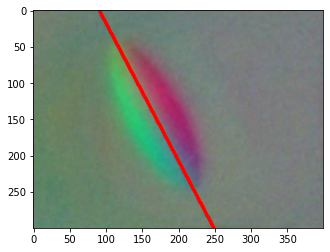

[0.43404764 0.4932858  0.5366384  0.86047924]


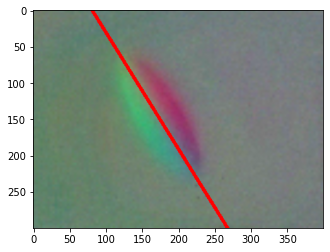

[0.5026798 0.5498583 0.5886048 0.8419367]


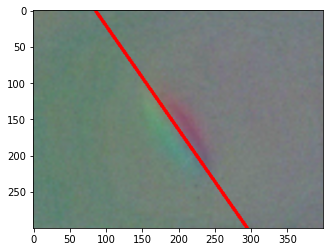

[0.55549455 0.6121181  0.7214809  0.62866414]


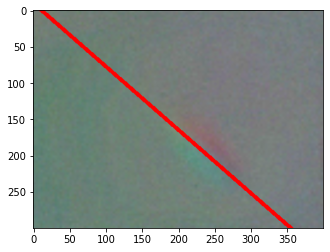

[0.60560524 0.66845715 0.8832373  0.44748762]


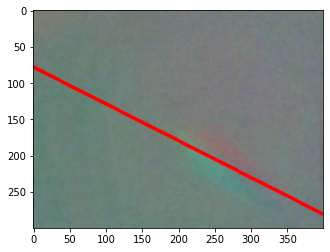

[0.55668294 0.6017684  0.8873341  0.4862212 ]


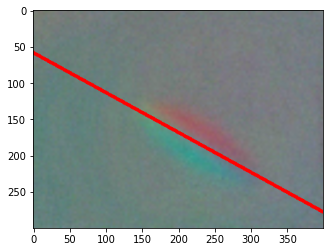

[0.5148075  0.56674504 0.9476317  0.45910352]


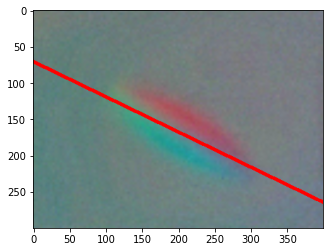

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.39441222 0.47365636 0.8421911  0.5035522 ]


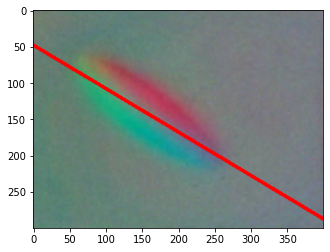

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.4014485  0.47967732 0.86372477 0.52040553]


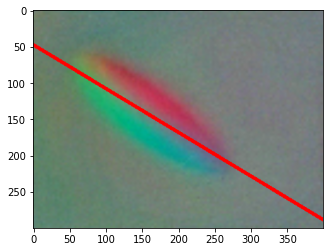

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.40900487 0.4875419  0.8707872  0.51413053]


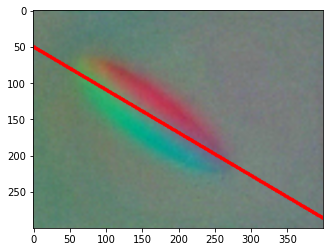

[0.46293277 0.5092169  0.8863322  0.5354713 ]


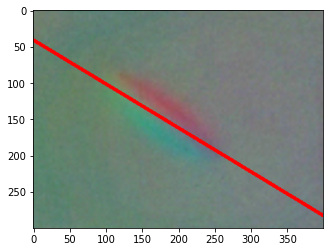

[0.3814848  0.40403718 0.9482412  0.5061897 ]


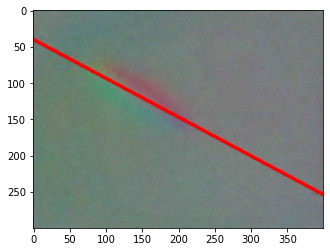

[0.534573   0.5203915  0.97877115 0.4173686 ]


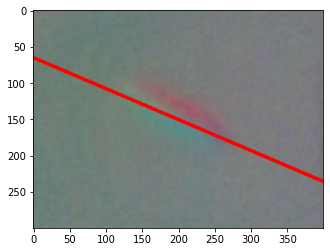

[0.5519675  0.52427095 0.98735136 0.40463424]


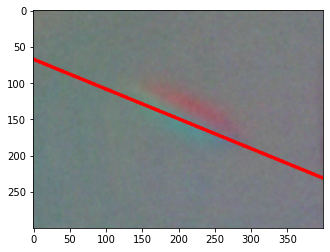

[0.6177504  0.53654945 1.0085881  0.37931758]


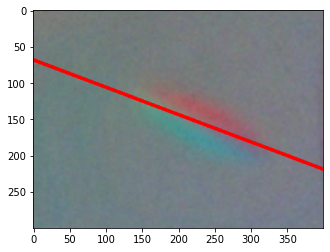

[0.5688363  0.53065413 0.99109685 0.3781594 ]


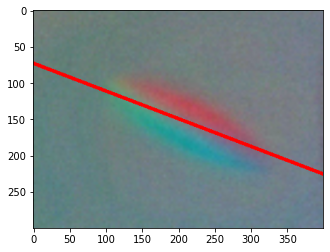

[0.53938234 0.5158285  0.94117814 0.41366908]


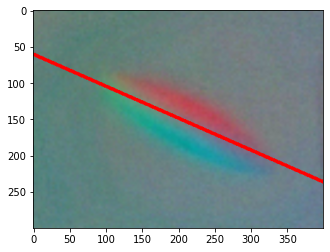

[0.54688865 0.5277115  0.97079635 0.40304935]


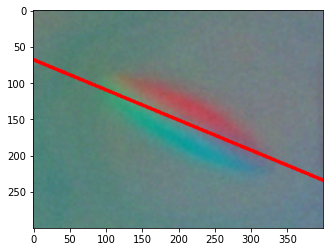

[0.48417985 0.45924193 0.9601178  0.52960384]


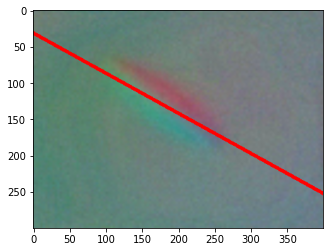

[0.46254987 0.48788792 0.6689431  0.78946185]


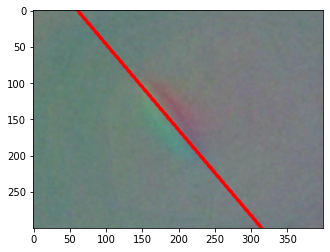

[0.44232982 0.4734365  0.31339076 0.9358735 ]


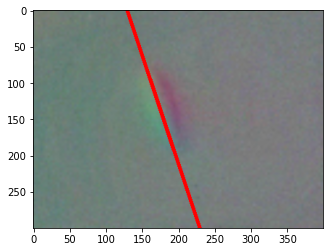

[0.44681203 0.45673957 0.29472014 0.9627805 ]


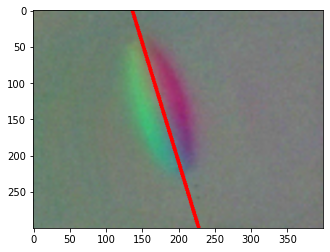

[0.45233792 0.4444975  0.28739285 0.9771222 ]


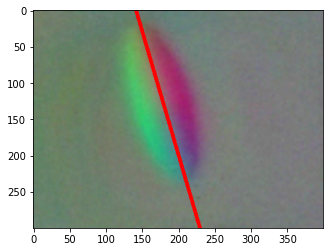

[0.45575726 0.44645596 0.26125112 0.99916005]


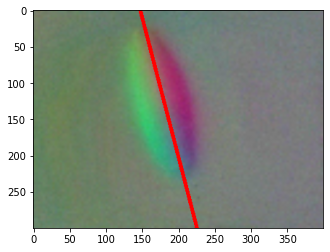

[0.4512071  0.4474318  0.13336551 1.0014212 ]


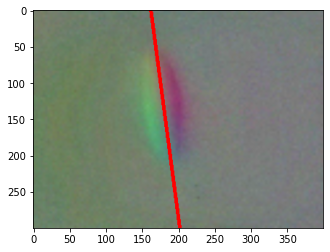

[ 0.44871512  0.46503195 -0.03038686  0.9812548 ]


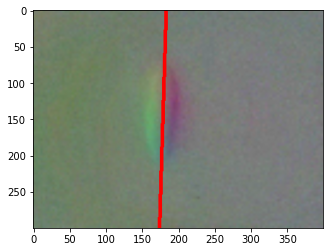

[ 0.42617452  0.56197417 -0.18089807  0.9862087 ]


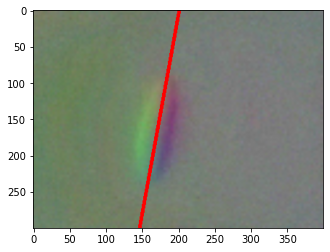

[ 0.4293458   0.48671407 -0.18564239  1.0018884 ]


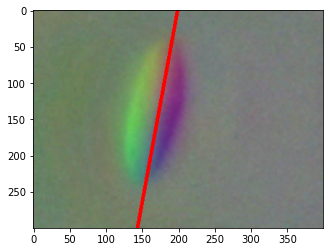

[ 0.43305346  0.49852133 -0.20868582  1.0035625 ]


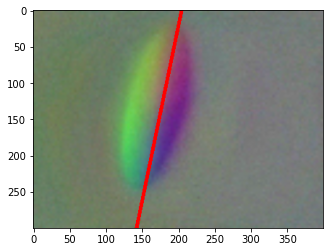

[ 0.4310178   0.50609255 -0.2238766   0.99324596]


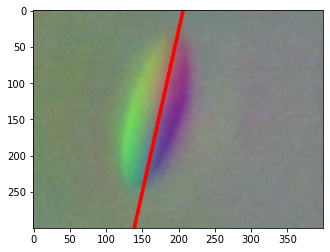

[ 0.4222621   0.5258398  -0.24802831  0.95662844]


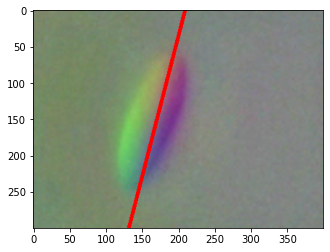

[ 0.4050894   0.5113079  -0.32311192  0.9188216 ]


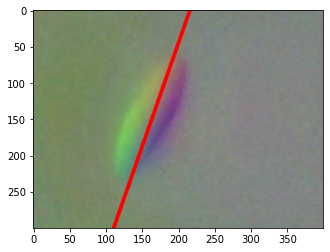

[ 0.4105591   0.48742092 -0.4809115   0.86028886]


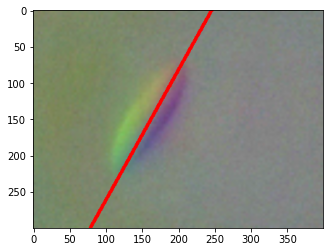

[ 0.32604283  0.6171849  -0.6188538   0.8081938 ]


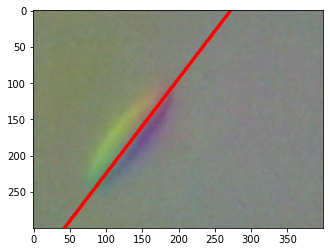

[ 0.35135123  0.55546075 -0.6500139   0.75900495]


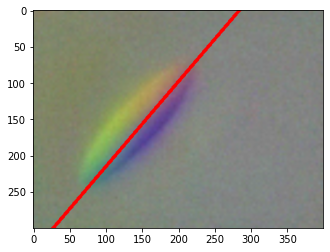

[ 0.32309836  0.5637003  -0.6409277   0.7461432 ]


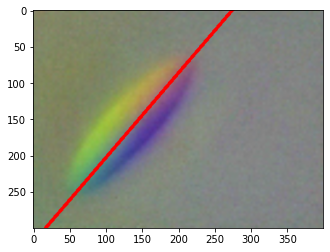

[ 0.3166151   0.5544874  -0.63330805  0.7430674 ]


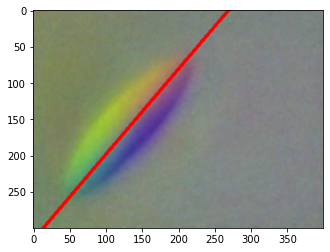

[ 0.3036751   0.5588753  -0.6448969   0.74396646]


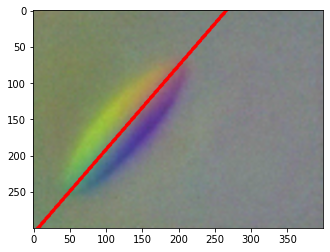

[ 0.32060406  0.53540856 -0.6725413   0.7102426 ]


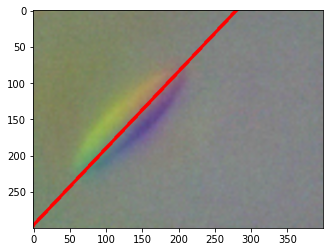

[ 0.30034044  0.5319214  -0.76547736  0.62184143]


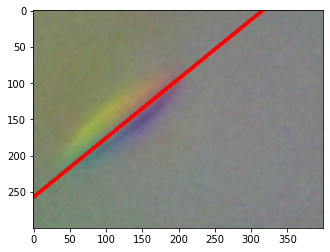

[ 0.26183516  0.5632565  -0.7290945   0.62737846]


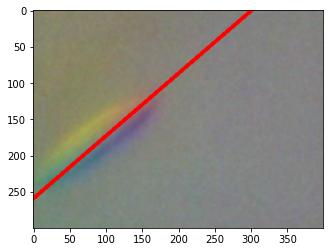

[ 0.24955586  0.5807203  -0.7768364   0.60232776]


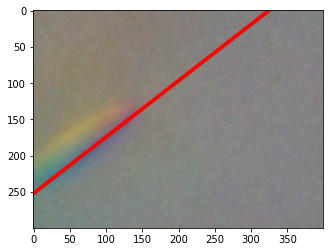

[ 0.26416865  0.5643266  -0.7365546   0.62385416]


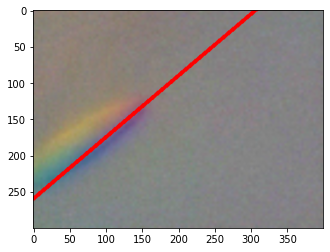

[ 0.2913196   0.52145875 -0.7453172   0.6165953 ]


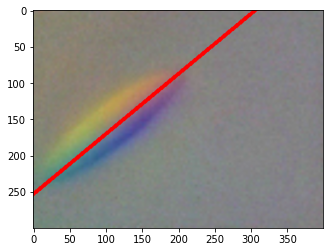

In [12]:
frame0 = frames[0]
# frame = frames[280]
frame = frames[460]

for _ in range(230, 500, 5):
    frame = frames[_]
    diff = (frame * 1.0 - frame0) / 255. * 4 + 0.5
    rendered_small = cv2.resize(diff, (120, 90))

    Y_pred = net.predict([rendered_small], device)
    i = 0
    x = rendered_small
    y = Y_pred[i]
    print(Y_pred[i])

    x = cv2.resize(x, (400, 300))
    theta = np.arctan2(y[2], y[3])
    rendered_img_line = draw_line(x, theta/np.pi*180., y[0], y[1])
    plt.figure()
    imshow(rendered_img_line)
